<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/bdm/F4/F4_Assignment7_library_3_%5B_Vaex_%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brewery Operations and Market Analysis Dataset

This dataset presents an extensive collection of data from a craft beer brewery, spanning from January 2020 to January 2024. It encapsulates a rich blend of brewing parameters, sales data, and quality assessments, providing a holistic view of the brewing process and its market implications.

[Kaggle Link](https://www.kaggle.com/datasets/ankurnapa/brewery-operations-and-market-analysis-dataset)

Project Team:

LYE KAH HOOI (MCS231010)\
THONG YEE MOON (MCS231001)\
LEE SEOW MING THERESA (MCS231013)\
SITI NORAFIZAH BINTI AB AZIZ (MCS231018)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Upload the kaggle Token
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"lyekahhooi","key":"0770886ac07f72a3595a1bd69071587d"}'}

# Import Dataset

In [ ]:
! pip install kaggle --quiet
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                    title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                        DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           2617        231  1.0              
thedevastator/global-video-game-sales-and-ratings      Global Video Game Sales and Ratings          71KB  2023-12-20 06:46:32           1442         31  0.9411765        
muhammadbinimran/housing-price-prediction-data         Housing Price Prediction Data               763KB  2023-11-21 17:56:32          11718        198  1.0              
thedevastator/film-genre-statistics                    Film Genre Statistics         

In [ ]:
!kaggle datasets download -d ankurnapa/brewery-operations-and-market-analysis-dataset

brewery-operations-and-market-analysis-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -u "/content/brewery-operations-and-market-analysis-dataset.zip"

Archive:  /content/brewery-operations-and-market-analysis-dataset.zip


# Vaex Installation

Vaex is a high performance data wrangling Python library for lazy Out-of-Core DataFrames (similar to Pandas), to visualize and explore big tabular datasets. It calculates statistics such as mean, sum, count, standard deviation etc, on an N-dimensional grid for more than a billion (10^9) samples/rows per second. Visualization is done using histograms, density plots and 3d volume rendering, allowing interactive exploration of big data. Vaex uses memory mapping, zero memory copy policy and lazy computations for best performance (no memory wasted)

\

It helps developers work with “uncomfortably large” datasets on a single machine using lazy evaluation, memory mapping, and integrations with C++ code. It’s specifically designed to work “out of core” – to process data that’s too big to be loaded into memory (RAM) all at once.

\

Vaex solves this problem by rebuilding a Pandas-like library “from the ground up,” taking advantage of lower-level C++ integrations for parallelization and lazy evaluation. Opening a 100GB dataset on a normal laptop is difficult with Pandas, but Vaex can do this efficiently, allowing developers to analyze larger datasets without compute clusters.

In [ ]:
%%capture
%%bash
python -m pip install -U pip
python -m pip install vaex-core
python -m pip install vaex-hdf5
python -m pip install -U ipython ipykernel

In [ ]:
pip install vaex-viz

In [ ]:
import vaex

# Function for Comparison

## Read file

In [ ]:
# Read file
%%time
df = vaex.open('/content/brewery_data_complete_extended.csv')

CPU times: user 1.59 s, sys: 583 ms, total: 2.17 s
Wall time: 4.8 s


In [ ]:
%%time
df

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.39 µs


#,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
0,7870796,2020-01-01 00:00:19,Wheat Beer,Kegs,Whitefield,16,24.204250857069873,5.2898454476095615,1.0395041267301979,5.370842159553436,20,5,1:0.32:0.16,4666,2664.7593448382822,8.57701633109399,89.19588216376087,4.1049876591878345,3.2354851724654683,4.663204448186049
1,9810411,2020-01-01 00:00:31,Sour,Kegs,Whitefield,13,18.086762947259544,5.275643382756193,1.0598189516987164,5.096053082797625,36,14,1:0.39:0.24,832,9758.801062471319,7.420540752553908,72.4809153900275,2.6765280953921122,4.2461292104108574,2.04435836917023
2,2623342,2020-01-01 00:00:40,Wheat Beer,Kegs,Malleswaram,12,15.539332669116469,4.7780156232459765,1.0374757095487201,4.824737120959184,30,10,1:0.35:0.16,2115,11721.087016274963,8.451364886803127,86.32214396020584,3.299893625514981,3.109440467362847,3.0338798378762806
3,8114651,2020-01-01 00:01:37,Ale,Kegs,Rajajinagar,17,16.41848910394318,5.345260585546188,1.0524314251694946,5.509243080797997,48,18,1:0.35:0.15,3173,12050.177463190277,9.671859404043175,83.09494037181545,2.136055116262562,4.634254174098425,1.4898890677148424
4,4579587,2020-01-01 00:01:43,Stout,Cans,Marathahalli,18,19.144907654338517,4.86185374113861,1.0542961149482333,5.133624684263243,57,13,1:0.46:0.11,4449,5515.0774647529615,7.895333676172065,88.62583302052388,4.491723843594972,2.1833886016455497,2.9906302188791485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"9,999,995",4575645,2023-12-31 23:58:59,Stout,Bottles,Yelahanka,12,20.719150891955422,4.944343208805361,1.0498763363614083,5.43713925537552,28,15,1:0.31:0.17,3054,6655.67383564915,6.264103925468877,79.6548150585106,4.612467540512821,1.4843886249579246,1.1186123399725973
"9,999,996",2074362,2023-12-31 23:59:18,Wheat Beer,Bottles,Electronic City,19,16.970908070607415,5.1219626073319,1.037019058817327,5.102428213127099,47,6,1:0.30:0.19,1985,10440.357816764359,9.651172255369218,89.11920096236504,2.112756384714795,1.1509463525290302,4.972988292838757
"9,999,997",177617,2023-12-31 23:59:41,IPA,Bottles,Malleswaram,10,24.386183588470104,4.747588087451058,1.0474898379446889,5.025250599461387,24,6,1:0.43:0.14,1982,17069.57285499178,9.060614192398543,72.55545544997851,3.3938563447699215,3.0112406937044605,2.1150542805453982
"9,999,998",7306891,2023-12-31 23:59:45,Ale,Kegs,Electronic City,18,18.056171610571347,5.007908502745378,1.0461376608233728,5.843181388461357,58,17,1:0.41:0.25,4016,5316.412808264866,6.2975618911741815,87.65089861853443,4.095873974557819,4.71150168181813,1.5356201670791085


## Data Understanding

In [ ]:
# Display first 5 rows of the DataFrame
%%time
df.head(5)

CPU times: user 970 µs, sys: 0 ns, total: 970 µs
Wall time: 977 µs


#,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
0,7870796,2020-01-01 00:00:19,Wheat Beer,Kegs,Whitefield,16,24.2043,5.28985,1.0395,5.37084,20,5,1:0.32:0.16,4666,2664.76,8.57702,89.1959,4.10499,3.23549,4.6632
1,9810411,2020-01-01 00:00:31,Sour,Kegs,Whitefield,13,18.0868,5.27564,1.05982,5.09605,36,14,1:0.39:0.24,832,9758.8,7.42054,72.4809,2.67653,4.24613,2.04436
2,2623342,2020-01-01 00:00:40,Wheat Beer,Kegs,Malleswaram,12,15.5393,4.77802,1.03748,4.82474,30,10,1:0.35:0.16,2115,11721.1,8.45136,86.3221,3.29989,3.10944,3.03388
3,8114651,2020-01-01 00:01:37,Ale,Kegs,Rajajinagar,17,16.4185,5.34526,1.05243,5.50924,48,18,1:0.35:0.15,3173,12050.2,9.67186,83.0949,2.13606,4.63425,1.48989
4,4579587,2020-01-01 00:01:43,Stout,Cans,Marathahalli,18,19.1449,4.86185,1.0543,5.13362,57,13,1:0.46:0.11,4449,5515.08,7.89533,88.6258,4.49172,2.18339,2.99063


In [ ]:
# Display information of the DataFrame
%%time
df.info()

column,type,unit,description,expression
Batch_ID,int64,,,
Brew_Date,datetime64[s],,,
Beer_Style,str,,,
SKU,str,,,
Location,str,,,
Fermentation_Time,int64,,,
Temperature,float64,,,
pH_Level,float64,,,
Gravity,float64,,,
Alcohol_Content,float64,,,


CPU times: user 1.55 s, sys: 154 ms, total: 1.71 s
Wall time: 1.81 s


In [ ]:
# Display descriptive statistics of the DataFrame
%%time
df.describe()

CPU times: user 4min, sys: 25.8 s, total: 4min 26s
Wall time: 2min 59s


,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
data_type,int64,datetime64[s],string,string,string,int64,float64,float64,float64,float64,int64,int64,string,int64,float64,float64,float64,float64,float64,float64
count,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,4999999.5,2021-12-31T12:24:42,--,--,--,14.500898,19.999898511017154,4.999940543893731,1.055002870078875,5.249709006579451,39.4961996,11.9993459,--,2749.0309594,10497.785343937843,7.99982514819217,80.00091934183457,3.000081497043089,3.000002413212676,3.000158710675014
std,2886751.345959,36441199.750714,--,--,--,2.872006,2.88703,0.288638,0.014435,0.432961,11.545572,4.32117,--,1299.078068,5485.995271,1.154679,5.774929,1.154748,1.154827,1.154719
min,0,2020-01-01T00:00:00,--,--,--,10,15.000001,4.5,1.03,4.5,20,5,--,500,1000.000963,6.000001,70.000007,1.0,1.000001,1.0
max,9999999,2024-01-01T00:00:00,--,--,--,19,24.999998,5.5,1.08,6.0,59,19,--,4999,19999.999641,9.999999,90.0,5.0,5.0,5.0


## Count

In [ ]:
# Count number of rows in the DataFrame
%%time
len(df)

CPU times: user 23 µs, sys: 2 µs, total: 25 µs
Wall time: 30 µs


10000000

In [ ]:
# Count the non-null values in in a variable
%%time
df['Fermentation_Time'].count()

CPU times: user 10.6 s, sys: 996 ms, total: 11.6 s
Wall time: 6.87 s


array(10000000)

## Mean

In [ ]:
# Calculate mean of a int64 variable
%%time
df.Fermentation_Time.mean()

CPU times: user 10.9 s, sys: 1.1 s, total: 12 s
Wall time: 8.4 s


array(14.500898)

In [ ]:
# Calculate mean of a float64 variable
%%time
df.Temperature.mean()

CPU times: user 11.4 s, sys: 1.03 s, total: 12.4 s
Wall time: 8.14 s


array(19.99989851)

## Standard Deviation

In [ ]:
# Calculate standard deviation of a int64 variable
%%time
df.Fermentation_Time.std()

CPU times: user 11.7 s, sys: 1.14 s, total: 12.9 s
Wall time: 7.93 s


2.8720059529179296

In [ ]:
#Calculate standard deviation of a int64 variable
%%time
df.Temperature.std()

CPU times: user 11.7 s, sys: 1.13 s, total: 12.8 s
Wall time: 7.67 s


2.887029567685582

## Sum columns

In [ ]:
# Sum of two columns
%%time
df['Fermentation_Time'] + df['Temperature']

CPU times: user 191 µs, sys: 0 ns, total: 191 µs
Wall time: 197 µs


Expression = (Fermentation_Time + Temperature)
Length: 10,000,000 dtype: float64 (expression)
----------------------------------------------
      0  40.2043
      1  31.0868
      2  27.5393
      3  33.4185
      4  37.1449
      ...       
9999995  32.7192
9999996  35.9709
9999997  34.3862
9999998  36.0562
9999999  33.1953

## Sum columns mean

In [ ]:
# Sum of two columns, then calcualte the mean of the new column
%%time
(df['Fermentation_Time'] + df['Temperature']).mean()

CPU times: user 16 s, sys: 3.21 s, total: 19.2 s
Wall time: 13.3 s


array(34.50079651)

## Value Counts

In [ ]:
# Counts of unique values in the 'Fermentation_Time' column
%%time
df.Fermentation_Time.value_counts()

CPU times: user 11.2 s, sys: 1.2 s, total: 12.4 s
Wall time: 7.99 s


13    1002039
17    1001838
18    1001023
11    1000379
15     999727
19     999499
12     999128
14     999084
16     998786
10     998497
dtype: int64

## Group-by

In [ ]:
# Group by "Beer Style" and calculate mean and std for "Fermentation_Time" & "Temperature"
%%time
df_group = df.groupby(by='Beer_Style').agg({'Fermentation_Time':['mean','std'],'Temperature':['mean','std']})
df_group

CPU times: user 29 s, sys: 3.13 s, total: 32.1 s
Wall time: 20.9 s


#,Beer_Style,Fermentation_Time_mean,Fermentation_Time_std,Temperature_mean,Temperature_std
0,Stout,14.5032,2.87261,19.9984,2.88808
1,Lager,14.5013,2.87213,20.0019,2.88556
2,Pilsner,14.501,2.87251,19.9977,2.88799
3,Ale,14.501,2.86997,19.9996,2.88509
4,Sour,14.5005,2.87125,20.0033,2.89015
5,IPA,14.4991,2.87086,19.996,2.88703
6,Wheat Beer,14.5039,2.8727,20.0028,2.88625
7,Porter,14.4973,2.87401,19.9993,2.88607


In [ ]:
# Group by "Beer_Style" and calculate mean for "Temperature"
%%time
df_temp = df.groupby(df.Beer_Style,agg=vaex.agg.mean(df.Temperature))
df_temp

CPU times: user 26 s, sys: 2.67 s, total: 28.7 s
Wall time: 18.2 s


#,Beer_Style,Temperature_mean
0,Stout,19.9984
1,Lager,20.0019
2,Pilsner,19.9977
3,Ale,19.9996
4,Sour,20.0033
5,IPA,19.996
6,Wheat Beer,20.0028
7,Porter,19.9993


In [ ]:
# Group by "Beer_Style" and calculate count
%%time
df_count = df.groupby(df.Beer_Style,agg='count')
df_count

CPU times: user 25.5 s, sys: 2.43 s, total: 27.9 s
Wall time: 19.6 s


#,Beer_Style,count
0,Stout,1250296
1,Lager,1249570
2,Pilsner,1249426
3,Ale,1251002
4,Sour,1250307
5,IPA,1249603
6,Wheat Beer,1249023
7,Porter,1250773


## Join

In [ ]:
# Vaex default join type is inner join
%%time
df_joined = df.join(df_group,on='Beer_Style')
df_joined

CPU times: user 12.7 s, sys: 1.24 s, total: 13.9 s
Wall time: 8.88 s


#,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging,Fermentation_Time_mean,Fermentation_Time_std,Temperature_mean,Temperature_std
0,7870796,2020-01-01 00:00:19,Wheat Beer,Kegs,Whitefield,16,24.204250857069873,5.2898454476095615,1.0395041267301979,5.370842159553436,20,5,1:0.32:0.16,4666,2664.7593448382822,8.57701633109399,89.19588216376087,4.1049876591878345,3.2354851724654683,4.663204448186049,14.503903450937253,2.8727031641231977,20.002825222406557,2.886246555888565
1,9810411,2020-01-01 00:00:31,Sour,Kegs,Whitefield,13,18.086762947259544,5.275643382756193,1.0598189516987164,5.096053082797625,36,14,1:0.39:0.24,832,9758.801062471319,7.420540752553908,72.4809153900275,2.6765280953921122,4.2461292104108574,2.04435836917023,14.500461086757092,2.8712494219343494,20.003314397183836,2.8901495596194122
2,2623342,2020-01-01 00:00:40,Wheat Beer,Kegs,Malleswaram,12,15.539332669116469,4.7780156232459765,1.0374757095487201,4.824737120959184,30,10,1:0.35:0.16,2115,11721.087016274963,8.451364886803127,86.32214396020584,3.299893625514981,3.109440467362847,3.0338798378762806,14.503903450937253,2.8727031641231977,20.002825222406557,2.886246555888565
3,8114651,2020-01-01 00:01:37,Ale,Kegs,Rajajinagar,17,16.41848910394318,5.345260585546188,1.0524314251694946,5.509243080797997,48,18,1:0.35:0.15,3173,12050.177463190277,9.671859404043175,83.09494037181545,2.136055116262562,4.634254174098425,1.4898890677148424,14.501019183022889,2.869973655385911,19.999626963312334,2.885093726183622
4,4579587,2020-01-01 00:01:43,Stout,Cans,Marathahalli,18,19.144907654338517,4.86185374113861,1.0542961149482333,5.133624684263243,57,13,1:0.46:0.11,4449,5515.0774647529615,7.895333676172065,88.62583302052388,4.491723843594972,2.1833886016455497,2.9906302188791485,14.503156852457337,2.8726073153924827,19.998393584013893,2.888080379410921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"9,999,995",4575645,2023-12-31 23:58:59,Stout,Bottles,Yelahanka,12,20.719150891955422,4.944343208805361,1.0498763363614083,5.43713925537552,28,15,1:0.31:0.17,3054,6655.67383564915,6.264103925468877,79.6548150585106,4.612467540512821,1.4843886249579246,1.1186123399725973,14.503156852457337,2.8726073153924827,19.998393584013893,2.888080379410921
"9,999,996",2074362,2023-12-31 23:59:18,Wheat Beer,Bottles,Electronic City,19,16.970908070607415,5.1219626073319,1.037019058817327,5.102428213127099,47,6,1:0.30:0.19,1985,10440.357816764359,9.651172255369218,89.11920096236504,2.112756384714795,1.1509463525290302,4.972988292838757,14.503903450937253,2.8727031641231977,20.002825222406557,2.886246555888565
"9,999,997",177617,2023-12-31 23:59:41,IPA,Bottles,Malleswaram,10,24.386183588470104,4.747588087451058,1.0474898379446889,5.025250599461387,24,6,1:0.43:0.14,1982,17069.57285499178,9.060614192398543,72.55545544997851,3.3938563447699215,3.0112406937044605,2.1150542805453982,14.499066503521519,2.8708610099024736,19.99604631096842,2.887031953789534
"9,999,998",7306891,2023-12-31 23:59:45,Ale,Kegs,Electronic City,18,18.056171610571347,5.007908502745378,1.0461376608233728,5.843181388461357,58,17,1:0.41:0.25,4016,5316.412808264866,6.2975618911741815,87.65089861853443,4.095873974557819,4.71150168181813,1.5356201670791085,14.501019183022889,2.869973655385911,19.999626963312334,2.885093726183622


## EDA Visualization

Vaex has no built-in method intended for plotting a scatter or line plot for lots of data. Its performance boost comes when plotting aggregate statistics like heatmaps, histograms

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Barplot

In [ ]:
%%time

Beer_count = df.Beer_Style.value_counts().rename_axis('Beer').reset_index(name='count')
Beer_count

CPU times: user 14.6 s, sys: 1.41 s, total: 16 s
Wall time: 10.5 s


,Beer,count
0,Ale,1251002
1,Porter,1250773
2,Sour,1250307
3,Stout,1250296
4,IPA,1249603
5,Lager,1249570
6,Pilsner,1249426
7,Wheat Beer,1249023


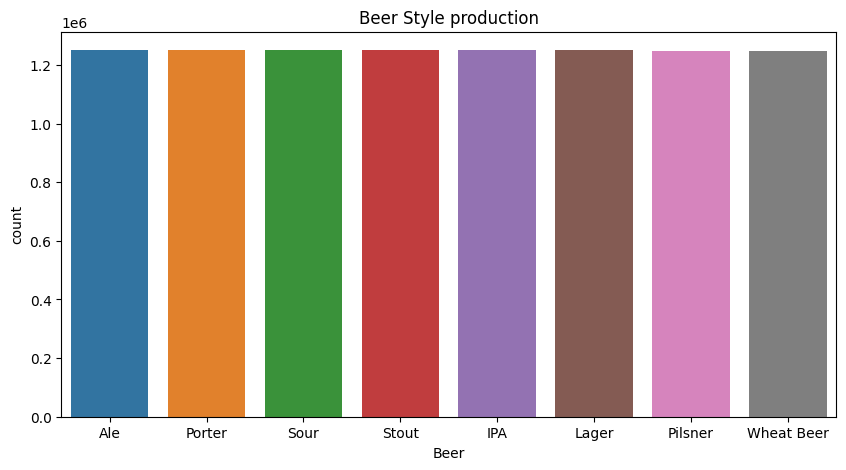

CPU times: user 419 ms, sys: 88.9 ms, total: 508 ms
Wall time: 487 ms


In [ ]:
# Show boxplot, only use this part for execution time calculation

%%time
plt.figure(figsize=(10,5))
sns.barplot(x='Beer', y='count',data=Beer_count).set(title="Beer Style production")
plt.show()

### Boxplot

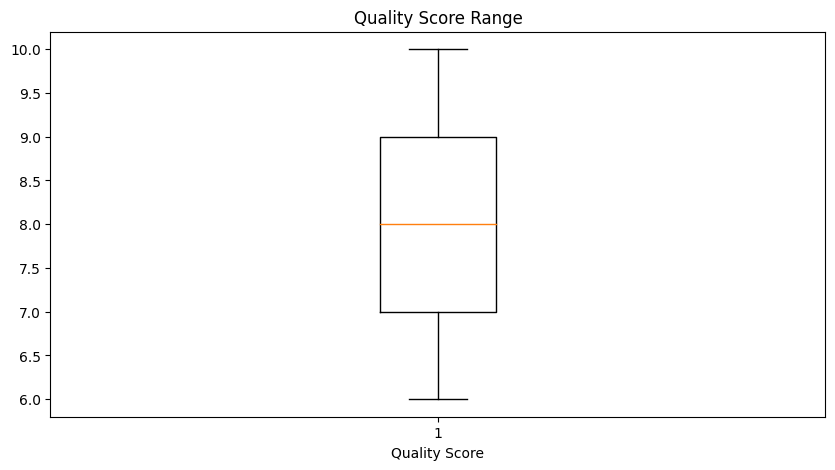

CPU times: user 13.6 s, sys: 1.39 s, total: 15 s
Wall time: 10.4 s


In [ ]:
%%time
plt.figure(figsize=(10,5))
plt.boxplot(x=df.Quality_Score)
plt.title('Quality Score Range')
plt.xlabel('Quality Score')
# sns.boxplot(x='Quality_Score',data=df,showfliers=False)
plt.show()

### Scatterplot

In [ ]:
%%time
df.Quality_Score.mean()

CPU times: user 13.2 s, sys: 1.19 s, total: 14.4 s
Wall time: 9.47 s


array(7.99982515)

In [ ]:
%%time
# Reduce the size of data by applying Selection Quality Score Above mean score > 8
x = df.evaluate("Bitterness", selection="Quality_Score > 8")
y = df.evaluate("Color", selection="Quality_Score > 8")

CPU times: user 27.7 s, sys: 2.41 s, total: 30.1 s
Wall time: 19.4 s


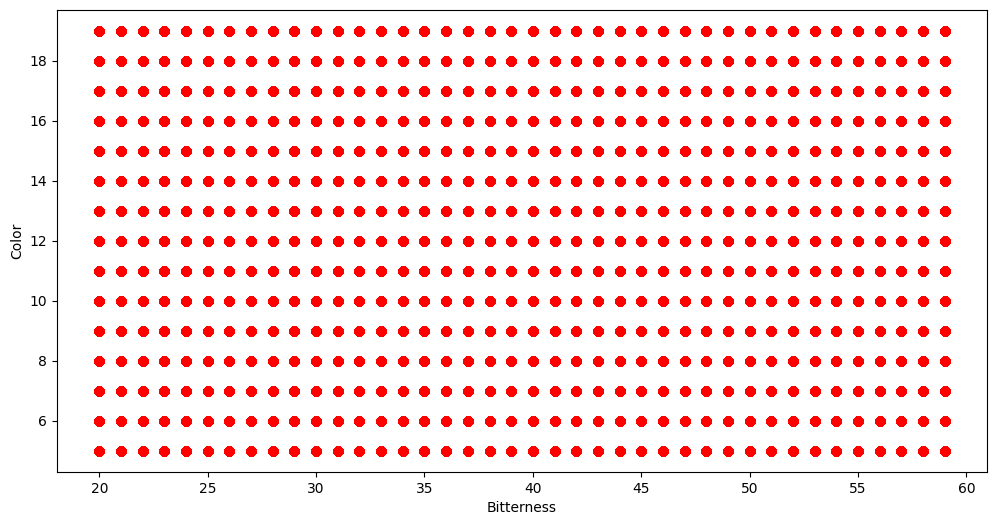

CPU times: user 9.94 s, sys: 294 ms, total: 10.2 s
Wall time: 10.1 s


In [ ]:
%%time
# Show Scatterplot, only use this part for execution time calculation
plt.figure(figsize=(12,6))
plt.scatter(x, y, c="red", alpha=0.5)
plt.xlabel('Bitterness')
plt.ylabel('Color')
plt.show()

### Lineplot

In [ ]:
%%time
df['year'] = df['Brew_Date'].dt.year
df['month'] = df['Brew_Date'].dt.month
df['day'] = df['Brew_Date'].dt.day

CPU times: user 1.87 ms, sys: 0 ns, total: 1.87 ms
Wall time: 1.88 ms


In [ ]:
%%time
df_filtered = df[((df.year==2023))&(df.month==1)&((df.Location=="HSR Layout"))&((df.Beer_Style=="Wheat Beer"))&((df.SKU=="Bottles"))&(df.Quality_Score>8)]
df_filtered.head(3)

CPU times: user 33.7 s, sys: 3.47 s, total: 37.2 s
Wall time: 25.2 s


#,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging,year,month,day
0,4863135,2023-01-01 00:00:23,Wheat Beer,Bottles,HSR Layout,11,22.7509,5.19796,1.04534,4.52882,31,19,1:0.29:0.18,4808,13583.6,8.40172,70.0953,3.90335,2.40049,2.55677,2023,1,1
1,6305750,2023-01-01 03:17:45,Wheat Beer,Bottles,HSR Layout,11,15.0858,4.77645,1.04512,5.35282,35,19,1:0.41:0.27,4841,10183.8,9.14702,81.687,1.4489,4.88499,4.44435,2023,1,1
2,164519,2023-01-01 04:33:50,Wheat Beer,Bottles,HSR Layout,14,23.7113,4.56205,1.06777,4.67295,25,7,1:0.36:0.15,2700,18407.5,9.48938,83.1202,3.53661,1.68566,3.87303,2023,1,1


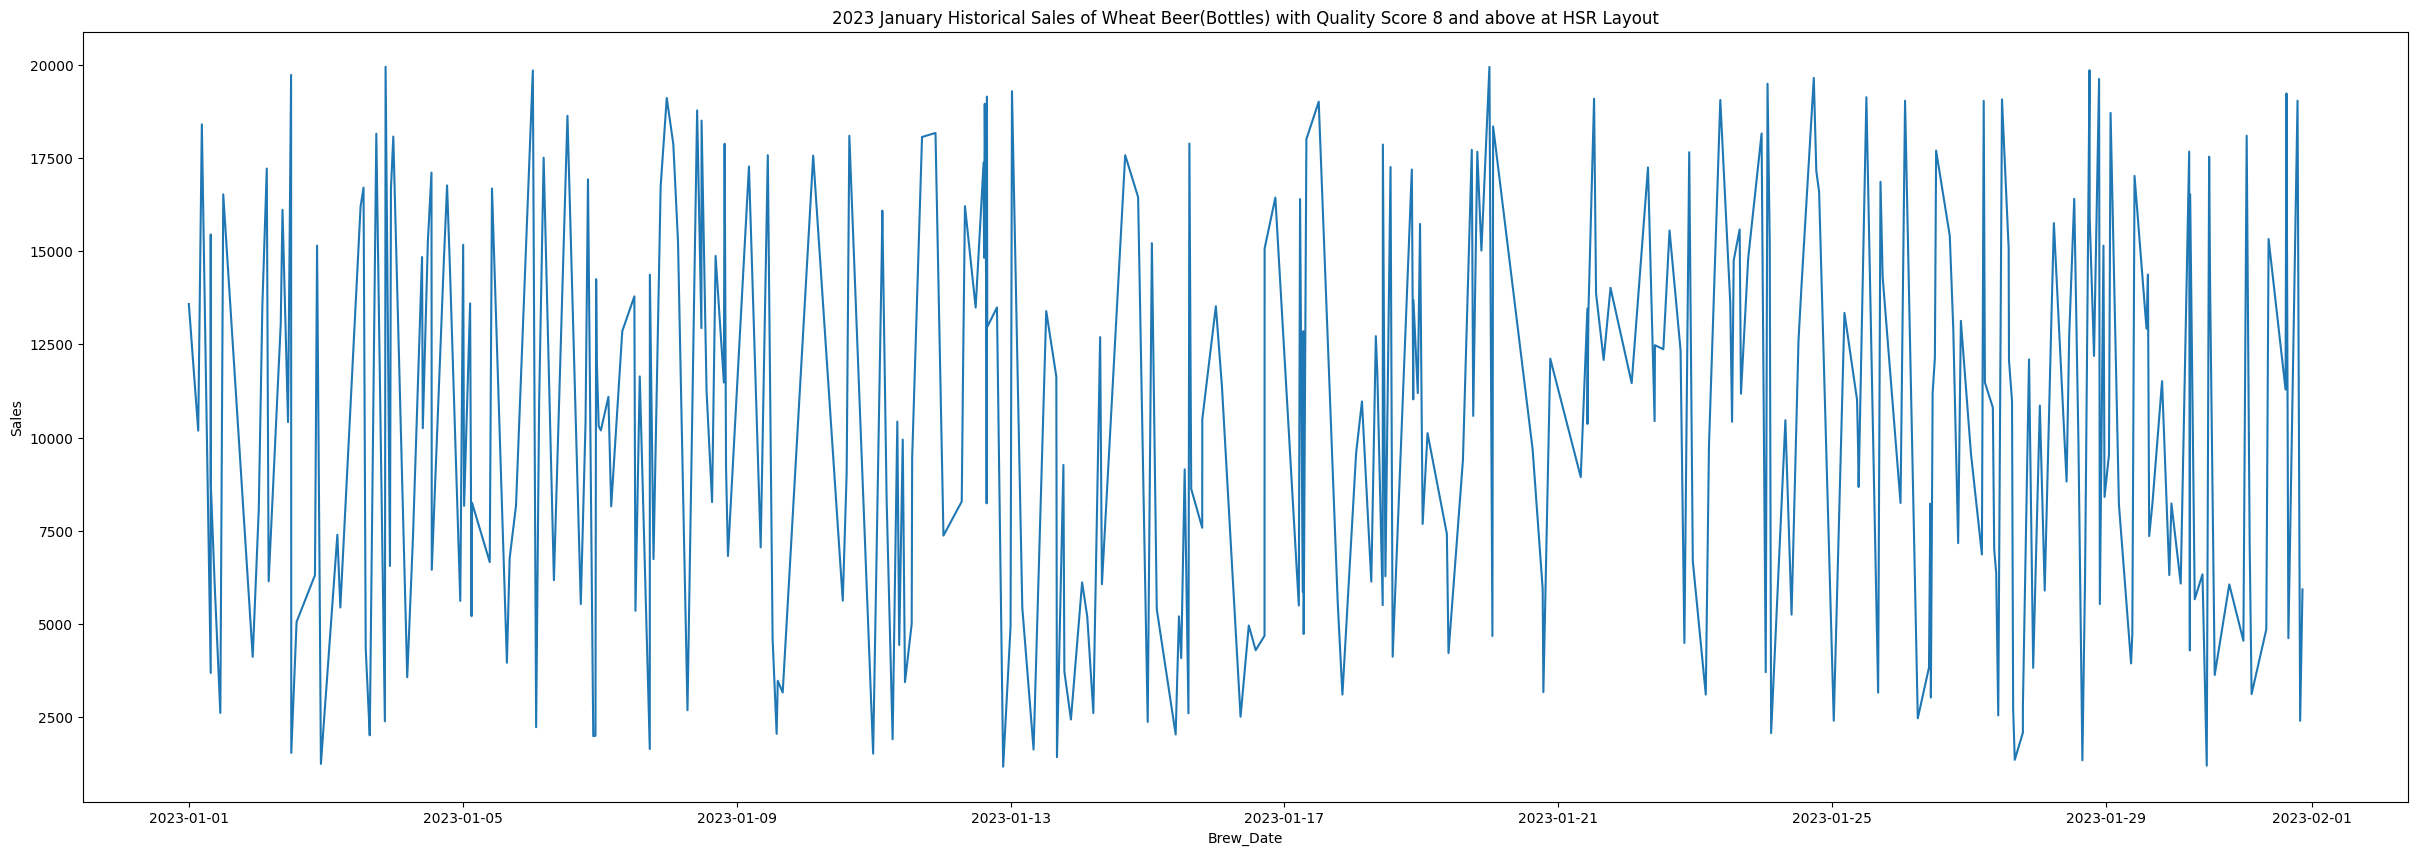

CPU times: user 33.2 s, sys: 3.17 s, total: 36.4 s
Wall time: 22.7 s


In [ ]:
%%time
# Show lineplot, only use this part for execution time calculation
plt.figure(figsize=(30,10))
plt.plot(df_filtered.Brew_Date, df_filtered.Total_Sales)
plt.xlabel('Brew_Date')
plt.ylabel('Sales')
plt.title('2023 January Historical Sales of Wheat Beer(Bottles) with Quality Score 8 and above at HSR Layout')
plt.show()

### Viz Histogram

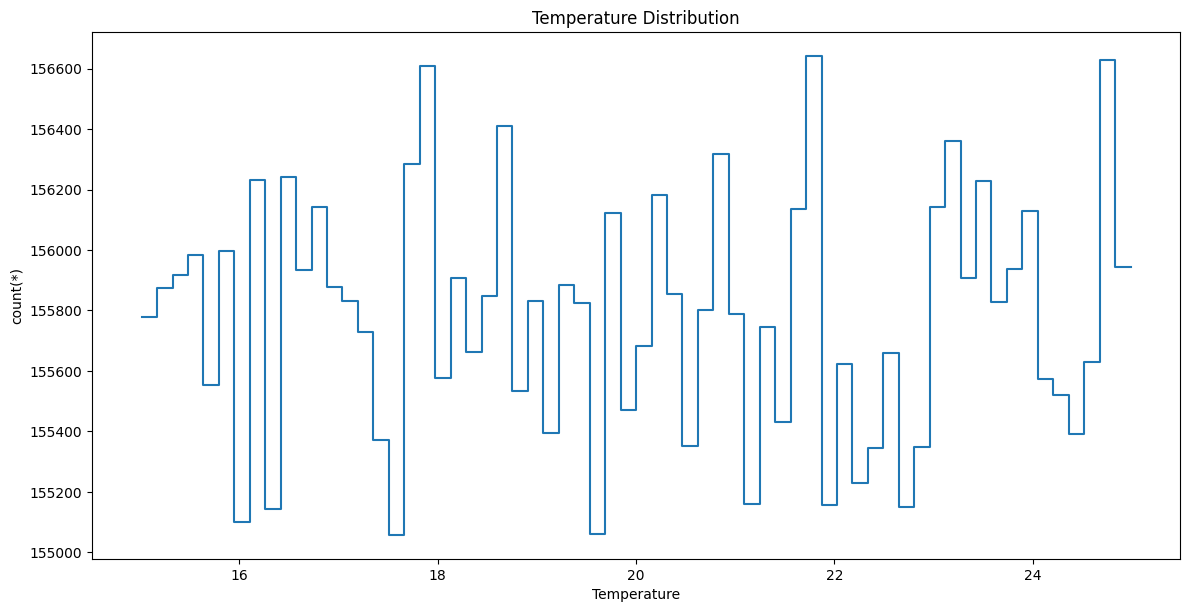

CPU times: user 39.3 s, sys: 3.63 s, total: 42.9 s
Wall time: 28.3 s


In [ ]:
%%time
plt.figure(figsize=(12,6))
df.viz.histogram(df.Temperature, limits='99.7%')
plt.title('Temperature Distribution')
plt.show()

### Heatmap

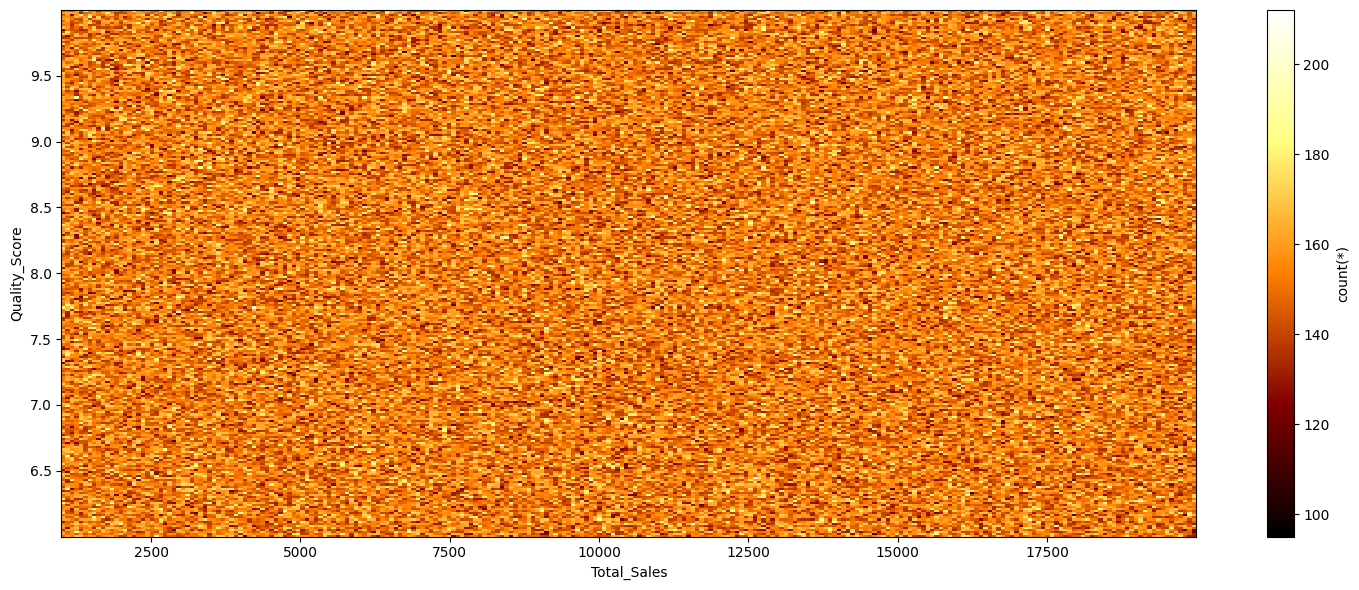

CPU times: user 28.7 s, sys: 2.53 s, total: 31.2 s
Wall time: 20.8 s


In [ ]:
%%time
plt.figure(figsize=(15,6))
df.viz.heatmap(df.Total_Sales , df.Quality_Score)
plt.show()

# 6 EDA Question

##   1. What is the distribution of Alcohol Content in the dataset?

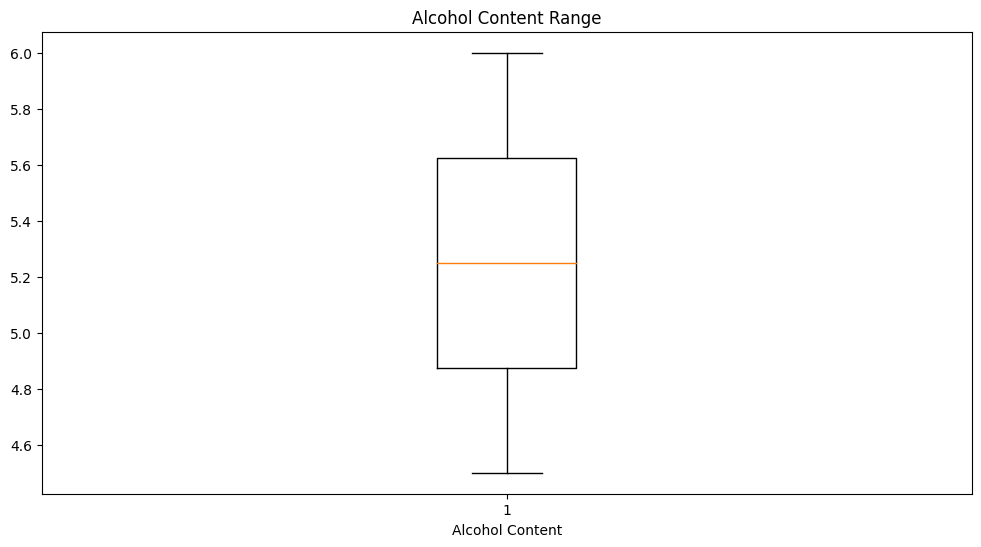

CPU times: user 13.9 s, sys: 1.27 s, total: 15.2 s
Wall time: 12.7 s


In [ ]:
%%time
plt.figure(figsize=(12,6))
plt.boxplot(x=df.Alcohol_Content)
plt.title('Alcohol Content Range')
plt.xlabel('Alcohol Content')
plt.show()

## 2. Is there a relationship between pH Level and Bitterness in the brewing process?

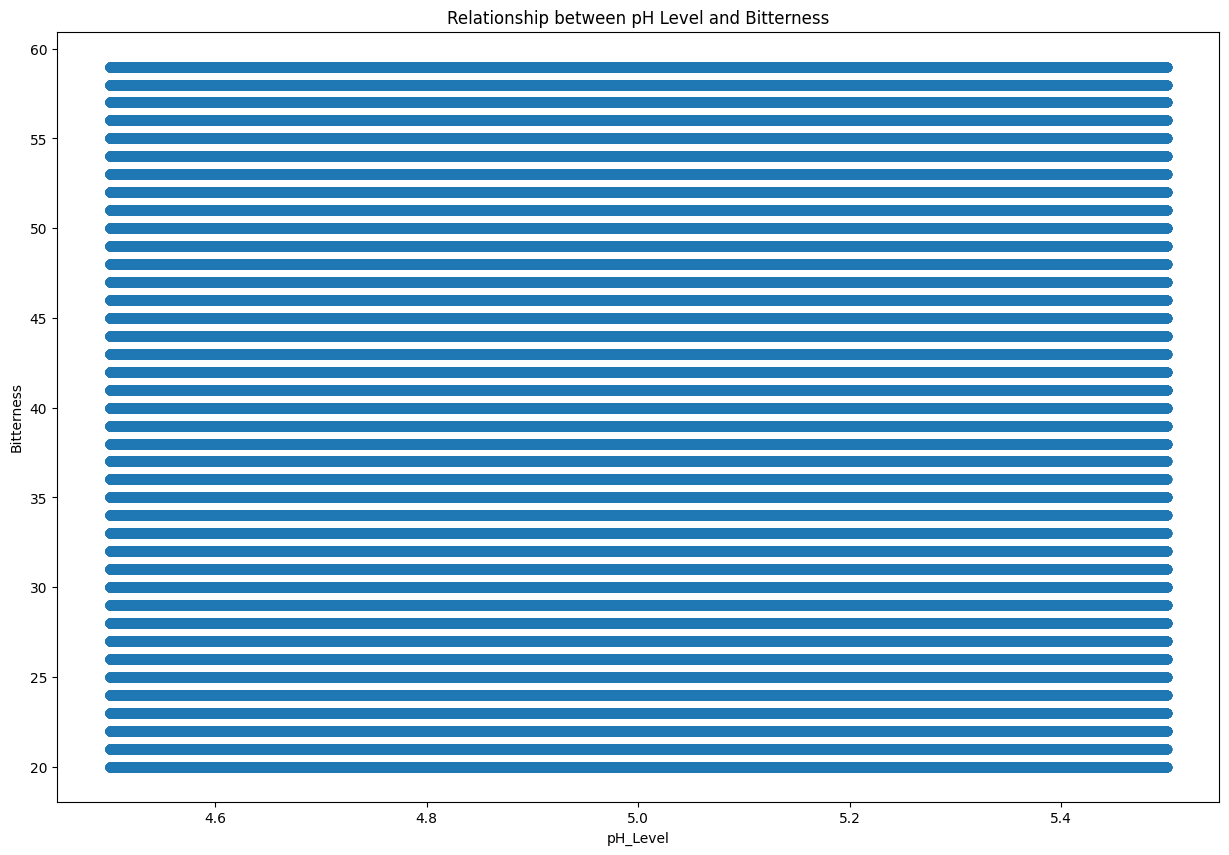

CPU times: user 38.8 s, sys: 2.53 s, total: 41.4 s
Wall time: 31.8 s


In [ ]:
## Reduce the size of data by applying Selection Quality Score Above mean score which is 8

%%time
x = df.evaluate("pH_Level", selection="Quality_Score > 8")
y = df.evaluate("Bitterness", selection="Quality_Score > 8")

plt.figure(figsize=(15,10))
plt.scatter(x, y)
plt.title('Relationship between pH Level and Bitterness')
plt.xlabel('pH_Level')
plt.ylabel('Bitterness')
plt.show()

## 3. What are the top 5 Beer Styles based on Total Sales?

In [ ]:
# Calculate the total sales of each beer type
%%time
beer_ranking=df.groupby(by='Beer_Style').agg({'Total_Sales': ['sum']})
beer_ranking

CPU times: user 29.7 s, sys: 2.71 s, total: 32.4 s
Wall time: 21.5 s


#,Beer_Style,Total_Sales_sum
0,Stout,1.3115e+10
1,Lager,1.31177e+10
2,Pilsner,1.31224e+10
3,Ale,1.31464e+10
4,Sour,1.31255e+10
5,IPA,1.31136e+10
6,Wheat Beer,1.31068e+10
7,Porter,1.31305e+10


In [ ]:
beer_ranking.Beer_Style

Expression = Beer_Style
Length: 8 dtype: large_string (column)
--------------------------------------
0       Stout
1       Lager
2     Pilsner
3         Ale
4        Sour
5         IPA
6  Wheat Beer
7      Porter

In [ ]:
x= list(map(str,beer_ranking.Beer_Style.values))
x

['Stout', 'Lager', 'Pilsner', 'Ale', 'Sour', 'IPA', 'Wheat Beer', 'Porter']

In [ ]:
y= list(map(int,beer_ranking.Total_Sales_sum.values))
type(y)

list

In [ ]:
import pandas as pd
beer_rank=pd.DataFrame({"Beer_Style":x,"Total_Sales":y})
# beer_rank=vaex.from_pandas(beer_rank)
beer_rank

,Beer_Style,Total_Sales
0,Stout,13115025836
1,Lager,13117665386
2,Pilsner,13122350032
3,Ale,13146382710
4,Sour,13125541866
5,IPA,13113569204
6,Wheat Beer,13106806375
7,Porter,13130512026


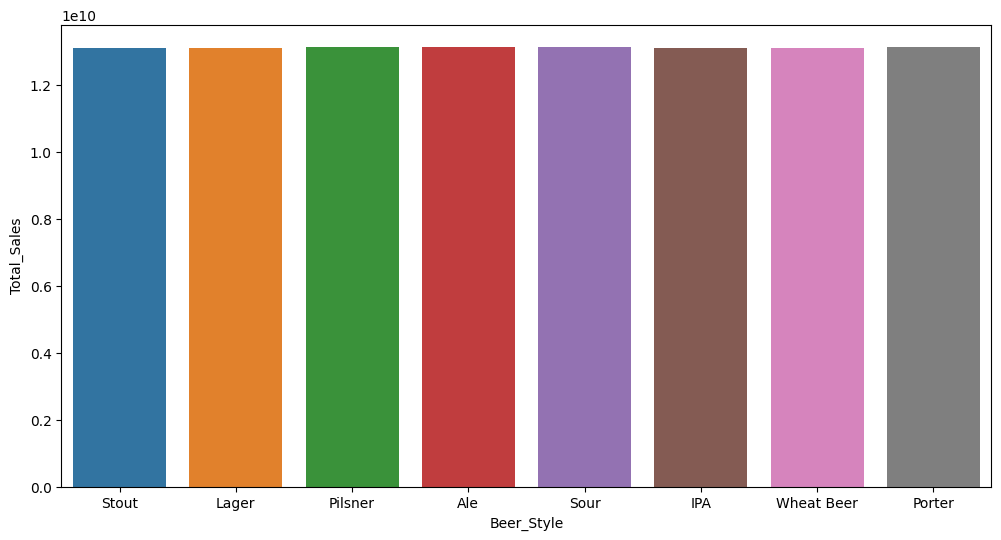

CPU times: user 198 ms, sys: 95.4 ms, total: 293 ms
Wall time: 182 ms


In [ ]:
%%time
plt.figure(figsize=(12, 6))
# sns.barplot(x='Beer_Style',y='Total_Sales_sum',data=(beer_ranking))
sns.barplot(x=beer_rank.Beer_Style,y=beer_rank.Total_Sales,data=(beer_rank))
plt.show()

## 4. Which Location produced the most beer?

In [ ]:
%%time

Location_count = df.Location.value_counts().rename_axis('Location').reset_index(name='count')
Location_count

CPU times: user 14.8 s, sys: 1.29 s, total: 16.1 s
Wall time: 10.7 s


,Location,count
0,HSR Layout,1000789
1,Jayanagar,1000760
2,Koramangala,1000220
3,Marathahalli,1000164
4,Rajajinagar,1000147
5,Indiranagar,999887
6,Yelahanka,999818
7,Malleswaram,999629
8,Electronic City,999307
9,Whitefield,999279


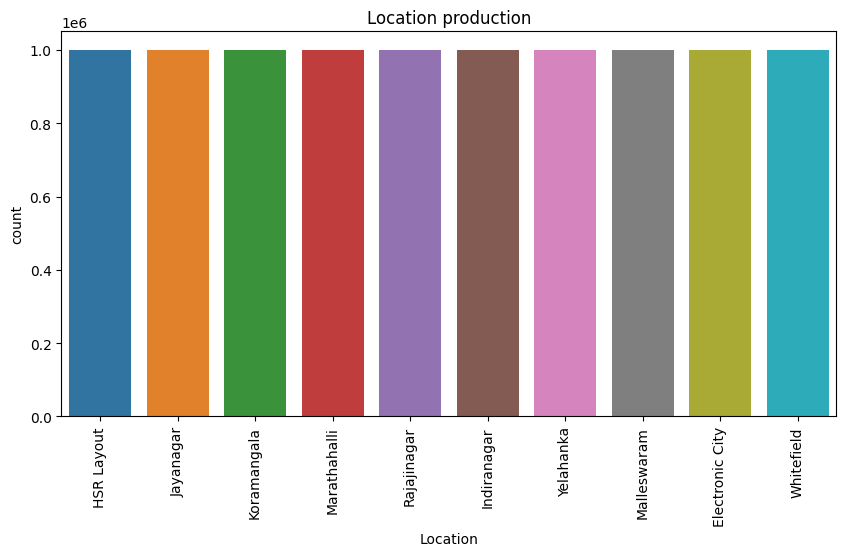

CPU times: user 219 ms, sys: 102 ms, total: 321 ms
Wall time: 207 ms


In [ ]:
# show barplot

%%time
plt.figure(figsize=(10,5))
sns.barplot(x='Location', y='count',data=Location_count).set(title="Location production")
plt.xticks(rotation='vertical')
plt.show()

## 5. What is the distribution of Fermentation Time, and are there any outliers?

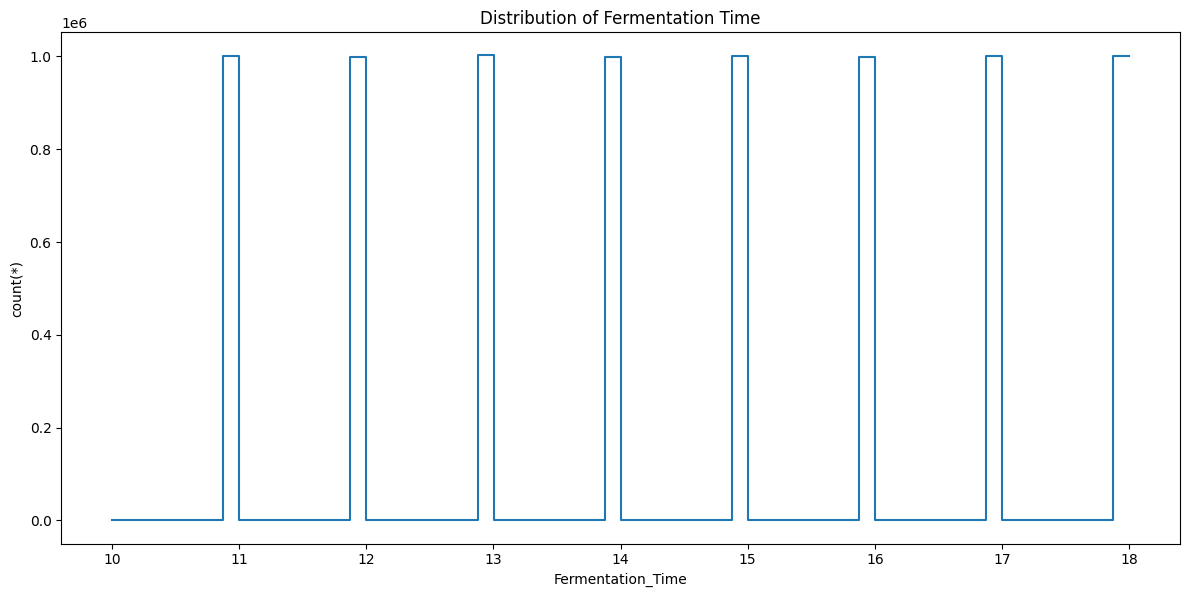

CPU times: user 39 s, sys: 3.33 s, total: 42.3 s
Wall time: 29.6 s


In [ ]:
%%time
plt.figure(figsize=(12,6))
df.viz.histogram(df.Fermentation_Time, limits='99.7%')
plt.title('Distribution of Fermentation Time')
plt.show()

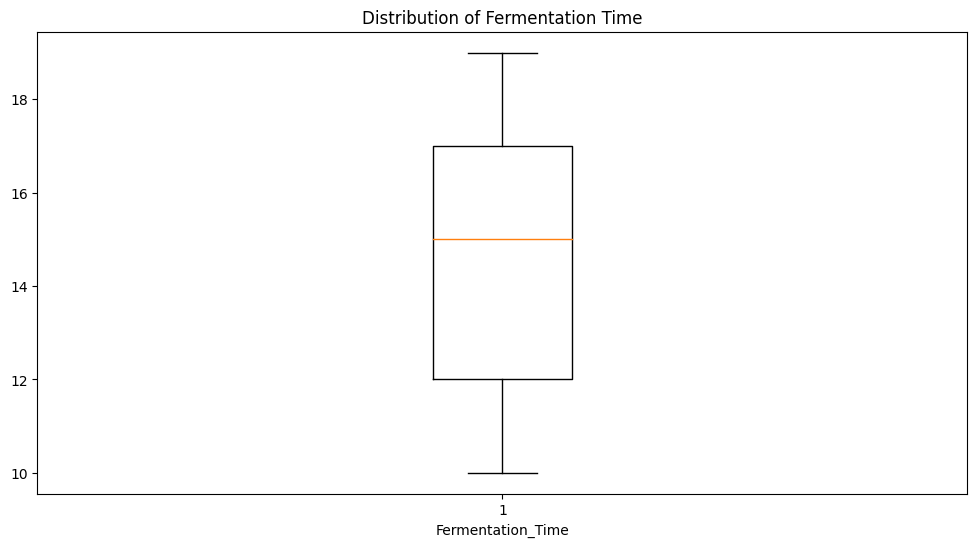

CPU times: user 13.7 s, sys: 1.28 s, total: 15 s
Wall time: 10.4 s


In [ ]:
%%time
plt.figure(figsize=(12,6))
plt.boxplot(x=df.Fermentation_Time)
plt.title('Distribution of Fermentation Time')
plt.xlabel('Fermentation_Time')
plt.show()

## 6. What is the Correlation between Alcohol Content and Quality Score ?

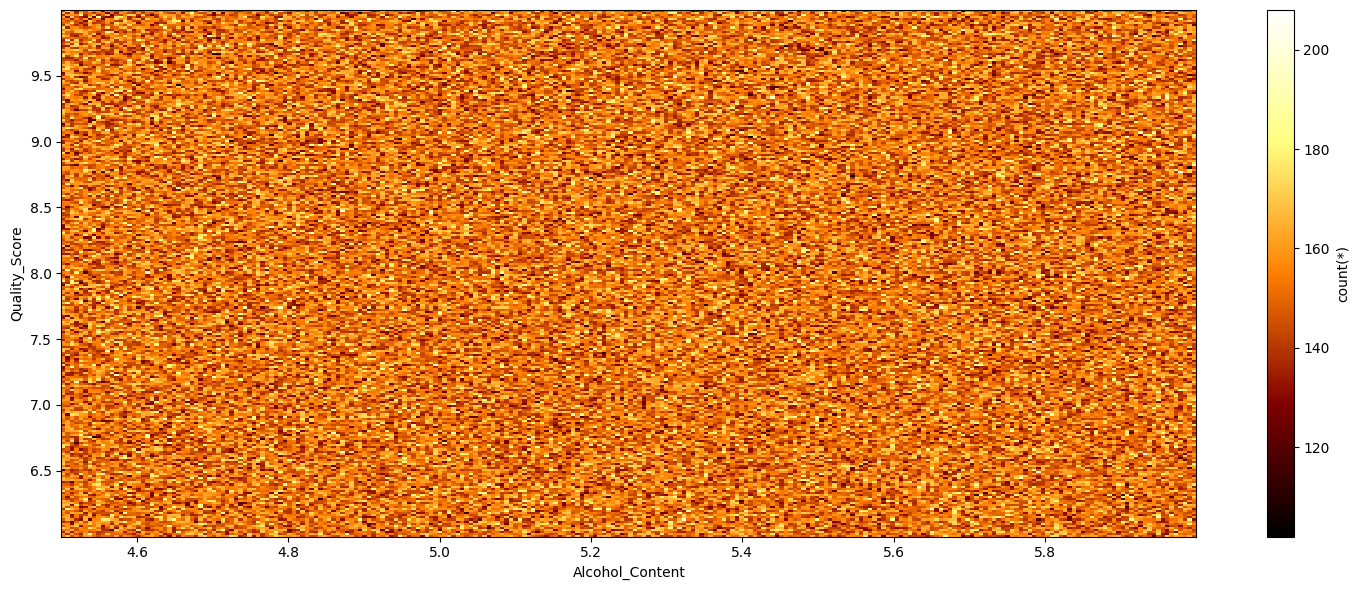

CPU times: user 33.1 s, sys: 5.66 s, total: 38.8 s
Wall time: 28.5 s


In [ ]:
%%time

plt.figure(figsize=(15,6))
df.viz.heatmap(df.Alcohol_Content, df.Quality_Score)
plt.show()